In [1]:
import numpy as np
import pandas as pd
from db_handler import DBHandler
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
from calendar import monthrange
%matplotlib inline

def parse_fetches(fetches):
    _new_fetches = list()
    for _fetch in fetches:
        for _doi in _fetch[0].split(", "):
            _new_fetches.append(
                (_doi, _fetch[1])
            )
    return _new_fetches

def get_dois_with_videos_within_days_from_publish(df, table_name, where=None, days_from=None, days_until=None):
#     複数の動画が与えられる論文の場合、複数のsetに含まれることがある。
    _set_target_dois = set()
    db_handler.sql_handler.select(table_name, ["idx_paper", "publishedAt"])
    if type(where) == tuple:
        db_handler.sql_handler.where(*where)
    fetches = db_handler.execute().fetchall()
    fetches = parse_fetches(fetches)
    
    for _row in fetches:
#         print("DOI:", _row[0])
        _target_paper = df[df["DOI"] == _row[0]]
#         if len(_target_paper) == 0:
#             continue
        if len(_target_paper) > 1:
            _target_paper = _target_paper.iloc[0]
#         print(_target_paper)
        _dt_publish = datetime(_target_paper["Year"], _target_paper["Month"], 1)
        
        if days_from != None:
            _dt_video_from = _dt_publish + timedelta(days=days_from)
            if _row[1] < _dt_video_from:
                continue
        
        if days_until != None:
            _dt_video_until = _dt_publish + timedelta(days=days_until)
            if _row[1] > _dt_video_until:
                continue
        
        _set_target_dois.add(_row[0])
    
#     if days_until == None:
#         _set_target_dois = set(map(lambda _row: _row[0], fetches))
#     else:
#         for _row in fetches:
#             _target_paper = df[df["DOI"] == _row[0]]
#             if len(_target_paper) > 1:
#                 _target_paper = _target_paper.iloc[0]
#             _dt_publish = datetime(_target_paper["Year"], _target_paper["Month"], 1)
            
#             _dt_video_from = _dt_publish + timedelta(days=days_from)
#             _dt_video_until = _dt_publish + timedelta(days=days_until)
            
#             if _row[1] < _dt_video_deadline:
#                 _set_target_dois.add(_row[0])
    
    return _set_target_dois

In [2]:
from scopus_handler import ScopusHandler
df1 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1901-1906.csv")
df1_sources = pd.read_csv("scopus/source-results-math_cs-citescore-2018.csv", header=0)
# df2 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1701-1706.csv")

df3 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1401-1406.csv")
df3_sources = pd.read_csv("scopus/source-results-math_cs-citescore-2013.csv", header=0)
# df3_sources = pd.read_csv("scopus/")

In [3]:
scopus_2014_comp = ScopusHandler(df3, df3_sources, "scopus_videos_2014_comp")
scopus_2019_comp = ScopusHandler(df1, df1_sources, "scopus_videos_2019_comp")

[+]Duplicates have been dropped from df_scopus.	Before: 9598	After: 9336
[+]Duplicates have been dropped from df_scopus.	Before: 14533	After: 14330


	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 102	Ratio: 0.011
# Total videos: 143	# Target videos: 143	Ratio: 1.000
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263
Journals:	Mean: 7.0	Std: 1.55
Papers:	Mean: 20.4	Std: 5.85
Partition 1 of 5
# journals w/ videos(norm): 6(-0.65)	# papers w/ videos(norm): 25(0.79)
Partition 2 of 5
# journals w/ videos(norm): 10(1.94)	# papers w/ videos(norm): 28(1.30)
Partition 3 of 5
# journals w/ videos(norm): 7(0.00)	# papers w/ videos(norm): 19(-0.24)
Partition 4 of 5
# journals w/ videos(norm): 6(-0.65)	# papers w/ videos(norm): 11(-1.61)
Partition 5 of 5
# journals w/ videos(norm): 6(-0.65)	# papers w/ videos(norm): 19(-0.24)


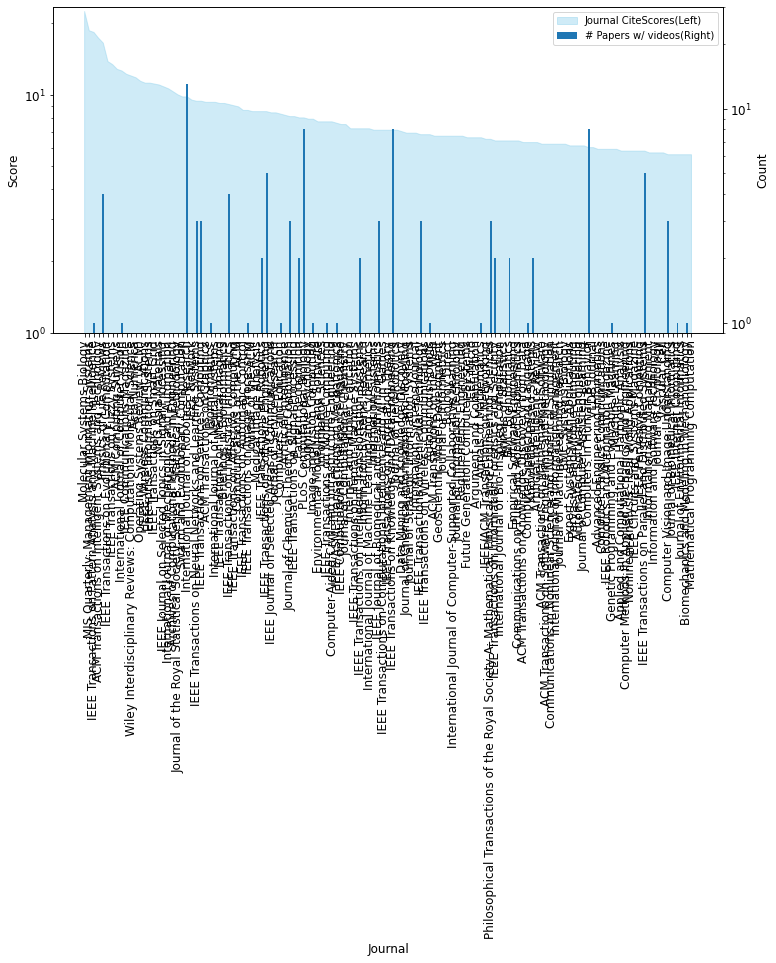

In [4]:
# pd.DataFrame(pd.Series([2,3,4], index=['a','b','c']))
scopus_2014_comp.plot_journals_scores()
# scopus_2014_comp.set_target_videos()

In [5]:
scopus_2014_comp.journals_scores

Source title
Molecular Systems Biology                                         22.4
MIS Quarterly: Management Information Systems                     18.6
IEEE Transactions on Pattern Analysis and Machine Intelligence    18.3
ACM Transactions on Intelligent Systems and Technology            17.3
Physics of Life Reviews                                           16.5
                                                                  ... 
Journal of Biomedical Informatics                                  5.6
IEEE Internet Computing                                            5.6
Journal of Environmental Informatics                               5.6
Biomechanics and Modeling in Mechanobiology                        5.6
Mathematical Programming Computation                               5.6
Length: 131, dtype: float64

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
# Total DOIs: 14330	# DOIs w/ videos: 64	Ratio: 0.004
# Total videos: 79	# Target videos: 79	Ratio: 1.000
# Total subjects: 46	# subjects w/ videos: 22	Ratio: 0.478
# Total journals: 133	# journals w/ videos: 36	Ratio: 0.271
Journals:	Mean: 7.2	Std: 2.23
Papers:	Mean: 12.8	Std: 6.18
Partition 1 of 5
# journals w/ videos(norm): 9(0.81)	# papers w/ videos(norm): 13(0.03)
Partition 2 of 5
# journals w/ videos(norm): 8(0.36)	# papers w/ videos(norm): 10(-0.45)
Partition 3 of 5
# journals w/ videos(norm): 7(-0.09)	# papers w/ videos(norm): 14(0.19)
Partition 4 of 5
# journals w/ videos(norm): 3(-1.89)	# papers w/ videos(norm): 4(-1.42)
Partition 5 of 5
# journals w/ videos(norm): 9(0.81)	# papers w/ videos(norm): 23(1.65)


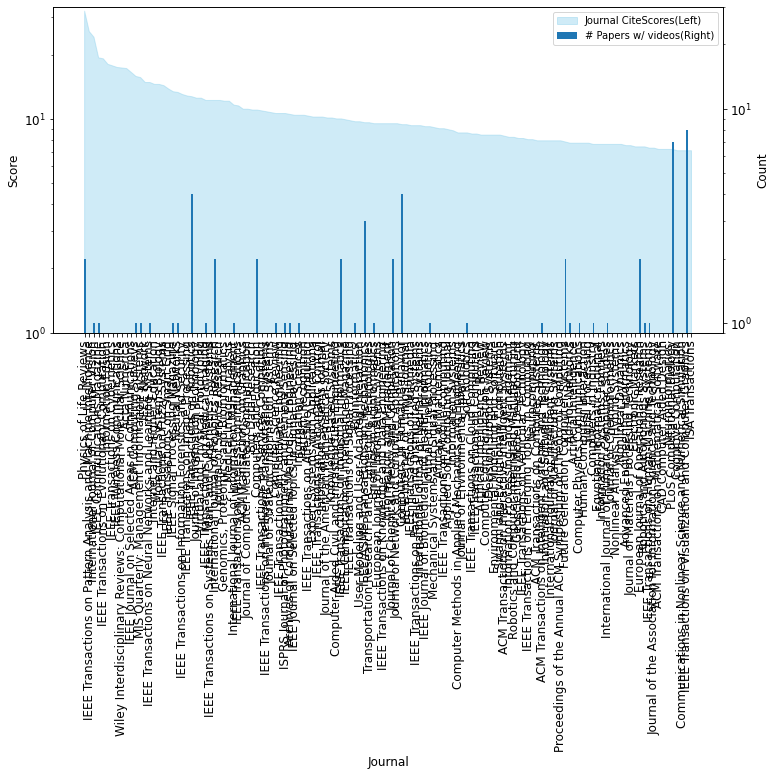

In [5]:
scopus_2019_comp.plot_journals_scores()

In [7]:
scopus_2019_comp.journals_scores

Source title
Physics of Life Reviews                                           31.9
IEEE Transactions on Pattern Analysis and Machine Intelligence    25.6
International Journal of Computer Vision                          24.1
IEEE Communications Magazine                                      19.3
IEEE Transactions on Evolutionary Computation                     19.1
                                                                  ... 
PLoS Computational Biology                                         7.2
Cognitive Computation                                              7.1
Communications in Nonlinear Science and Numerical Simulation       7.1
IEEE Transactions on Visualization and Computer Graphics           7.1
ISA Transactions                                                   7.1
Length: 131, dtype: float64

In [8]:
scopus_2014_comp.desc_journals_scores(partition=5)

Partition 1 of 5
# journals w/ videos: 6	# papers w/ videos: 25
Partition 2 of 5
# journals w/ videos: 10	# papers w/ videos: 28
Partition 3 of 5
# journals w/ videos: 7	# papers w/ videos: 19
Partition 4 of 5
# journals w/ videos: 6	# papers w/ videos: 11
Partition 5 of 5
# journals w/ videos: 6	# papers w/ videos: 19
Journals:	Mean: 7.0	Std: 1.55
Papers:	Mean: 20.4	Std: 5.85


In [9]:
scopus_2019_comp.desc_journals_scores(partition=5)

Partition 1 of 5
# journals w/ videos: 9	# papers w/ videos: 13
Partition 2 of 5
# journals w/ videos: 8	# papers w/ videos: 10
Partition 3 of 5
# journals w/ videos: 7	# papers w/ videos: 14
Partition 4 of 5
# journals w/ videos: 3	# papers w/ videos: 4
Partition 5 of 5
# journals w/ videos: 9	# papers w/ videos: 23
Journals:	Mean: 7.2	Std: 2.23
Papers:	Mean: 12.8	Std: 6.18


발행 후 1년 이내 비디오 논문에 대해

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 67	Ratio: 0.007
# Total videos: 143	# Target videos: 79	Ratio: 0.552
# Total subjects: 43	# subjects w/ videos: 18	Ratio: 0.419
# Total journals: 133	# journals w/ videos: 25	Ratio: 0.188
Journals:	Mean: 5.0	Std: 1.41
Papers:	Mean: 13.4	Std: 5.95
Partition 1 of 5
# journals w/ videos(norm): 5(0.00)	# papers w/ videos(norm): 21(1.28)
Partition 2 of 5
# journals w/ videos(norm): 7(1.41)	# papers w/ videos(norm): 17(0.60)
Partition 3 of 5
# journals w/ videos(norm): 6(0.71)	# papers w/ videos(norm): 16(0.44)
Partition 4 of 5
# journals w/ videos(norm): 4(-0.71)	# papers w/ videos(norm): 5(-1.41)
Partition 5 of 5
# journals w/ videos(norm): 3(-1.41)	# papers w/ videos(norm): 8(-0.91)


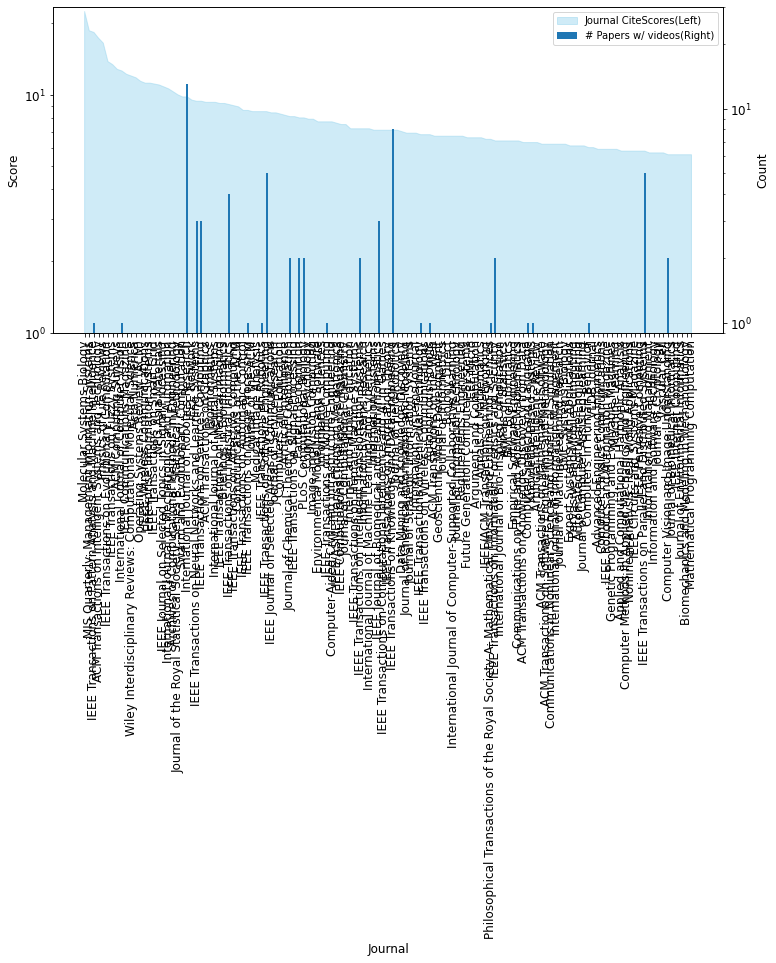

In [6]:
scopus_2014_comp.plot_journals_scores(days_until=360)

In [11]:
# until 360
print(scopus_2014_comp.journals_w_videos)

International Journal of Robotics Research                                                            13
IEEE Transactions on Knowledge and Data Engineering                                                    8
IEEE Transactions on Parallel and Distributed Systems                                                  5
IEEE Transactions on Software Engineering                                                              5
IEEE Transactions on Industrial Informatics                                                            4
IEEE Transactions on Neural Networks and Learning Systems                                              3
IEEE Transactions on Services Computing                                                                3
IEEE Journal of Biomedical and Health Informatics                                                      3
Journal of Chemical Theory and Computation                                                             2
PLoS Computational Biology                             

2019?

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
# Total DOIs: 14330	# DOIs w/ videos: 50	Ratio: 0.003
# Total videos: 79	# Target videos: 63	Ratio: 0.797
# Total subjects: 46	# subjects w/ videos: 20	Ratio: 0.435
# Total journals: 133	# journals w/ videos: 26	Ratio: 0.195
Journals:	Mean: 5.2	Std: 2.48
Papers:	Mean: 10.0	Std: 6.10
Partition 1 of 5
# journals w/ videos(norm): 4(-0.48)	# papers w/ videos(norm): 7(-0.49)
Partition 2 of 5
# journals w/ videos(norm): 6(0.32)	# papers w/ videos(norm): 8(-0.33)
Partition 3 of 5
# journals w/ videos(norm): 7(0.73)	# papers w/ videos(norm): 13(0.49)
Partition 4 of 5
# journals w/ videos(norm): 1(-1.69)	# papers w/ videos(norm): 2(-1.31)
Partition 5 of 5
# journals w/ videos(norm): 8(1.13)	# papers w/ videos(norm): 20(1.64)


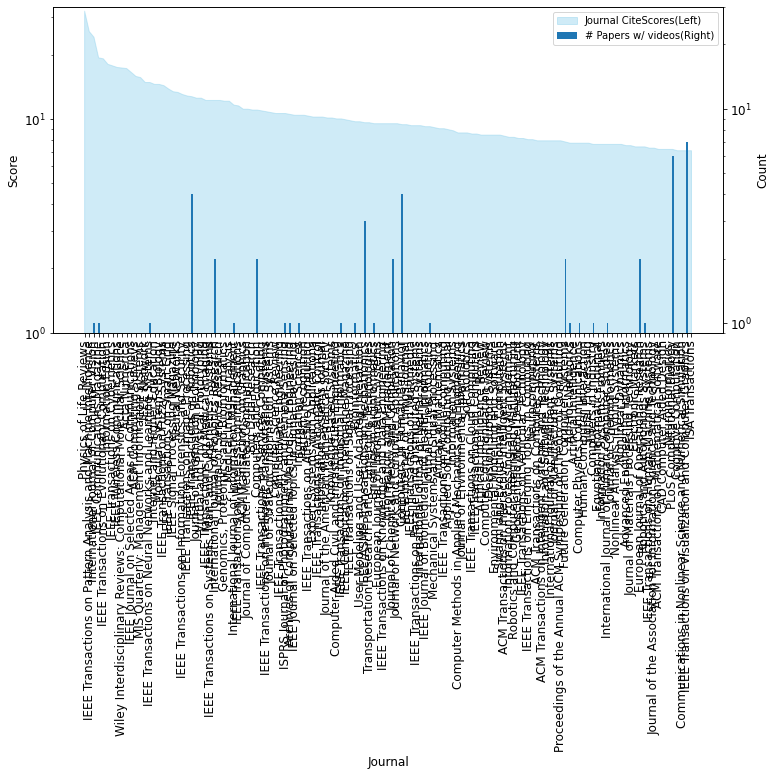

In [7]:
# until 360
scopus_2019_comp.plot_journals_scores(days_until=360)

In [14]:
# until 360
scopus_2019_comp.journals_w_videos

IEEE Transactions on Visualization and Computer Graphics     7
PLoS Computational Biology                                   6
IEEE Transactions on Robotics                                4
Computers in Human Behavior                                  4
IEEE/ASME Transactions on Mechatronics                       3
Journal of Chemical Theory and Computation                   2
International Journal of Robotics Research                   2
European Journal of Operational Research                     2
Future Generation Computer Systems                           2
Computers and Education                                      2
International Journal of Human Computer Studies              1
International Journal of Computer Vision                     1
Information Sciences                                         1
Robotics and Autonomous Systems                              1
IEEE Transactions on Industrial Informatics                  1
Computers in Industry                                  

3~4% 저널에 비디오가 특히 없는 이유가 뭐지?

In [10]:
scopus_2014_comp.journals_total_w_videos[int(3 * len(scopus_2014_comp.journals_total) / 5) : int(4 * len(scopus_2014_comp.journals_total) / 5)]

Journal of the Royal Statistical Society. Series B: Statistical Methodology    0
ACM Computing Surveys                                                          0
IEEE Transactions on Services Computing                                        3
International Journal of Neural Systems                                        0
MIS Quarterly: Management Information Systems                                  0
Communications on Pure and Applied Mathematics                                 0
ACM Transactions on Mathematical Software                                      0
Empirical Software Engineering                                                 0
Information Systems                                                            0
Swarm and Evolutionary Computation                                             0
Journal of Computer Assisted Learning                                          0
Annals of Mathematics                                                          0
IEEE Computational Intellige

In [11]:
scopus_2019_comp.journals_total_w_videos[int(3 * len(scopus_2019_comp.journals_total) / 5) : int(4 * len(scopus_2019_comp.journals_total) / 5)]

IEEE Signal Processing Magazine                           0
Journal of Field Robotics                                 1
Advanced Engineering Informatics                          0
IEEE Transactions on Evolutionary Computation             0
IEEE Transactions on Services Computing                   0
International Journal of Robotics Research                2
Information Systems Frontiers                             0
CAD Computer Aided Design                                 0
Journal of Manufacturing Systems                          0
International Journal of Neural Systems                   0
Soft Robotics                                             0
Genomics, Proteomics and Bioinformatics                   0
Briefings in Bioinformatics                               1
IEEE Transactions on Software Engineering                 0
Cognitive Computation                                     0
MIS Quarterly: Management Information Systems             0
Computer-Aided Civil and Infrastructure 

비디오 있는 저널: 18.7%(2014) -> 19.5%(2019)
전체 저널 수: 134 -> 133 변화 없음

따라서 2014년이나 2019년이나 약 19%의 저널에 대해, 논문 언급 비디오가 존재했다.

혹시 논문 해설 영상에 대해선?

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
# Total DOIs: 9336	# DOIs w/ videos: 13	Ratio: 0.001
# Total videos: 16	# Target videos: 16	Ratio: 1.000
# Total subjects: 43	# subjects w/ videos: 9	Ratio: 0.209
# Total journals: 134	# journals w/ videos: 10	Ratio: 0.075


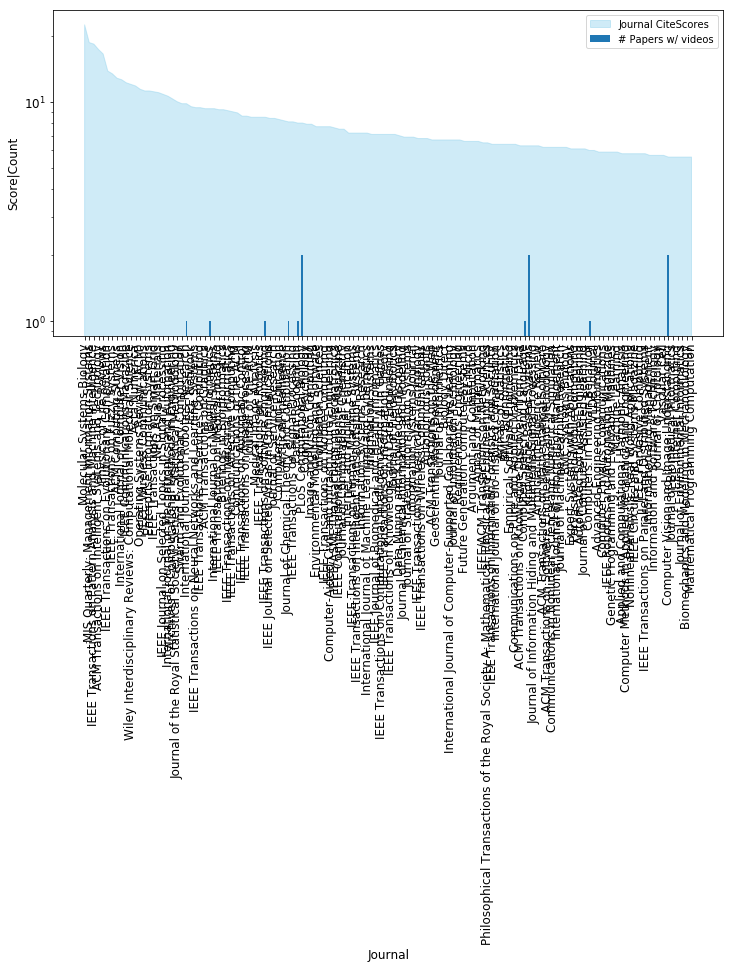

In [11]:
scopus_2014_comp.plot_journals_scores(where=("content", ["paper_explanation", "paper_assessment", "paper_application"], "in"))

In [12]:
scopus_2014_comp.journals_w_videos

Computer Vision and Image Understanding       2
Knowledge-Based Systems                       2
PLoS Computational Biology                    2
Bioinformatics                                1
IEEE Transactions on Software Engineering     1
Computer Speech and Language                  1
Pattern Recognition                           1
Computers in Human Behavior                   1
International Journal of Robotics Research    1
Journal of Chemical Theory and Computation    1
Name: Source title, dtype: int64

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
# Total DOIs: 9336	# DOIs w/ videos: 5	Ratio: 0.001
# Total videos: 16	# Target videos: 5	Ratio: 0.312
# Total subjects: 43	# subjects w/ videos: 3	Ratio: 0.070
# Total journals: 134	# journals w/ videos: 4	Ratio: 0.030


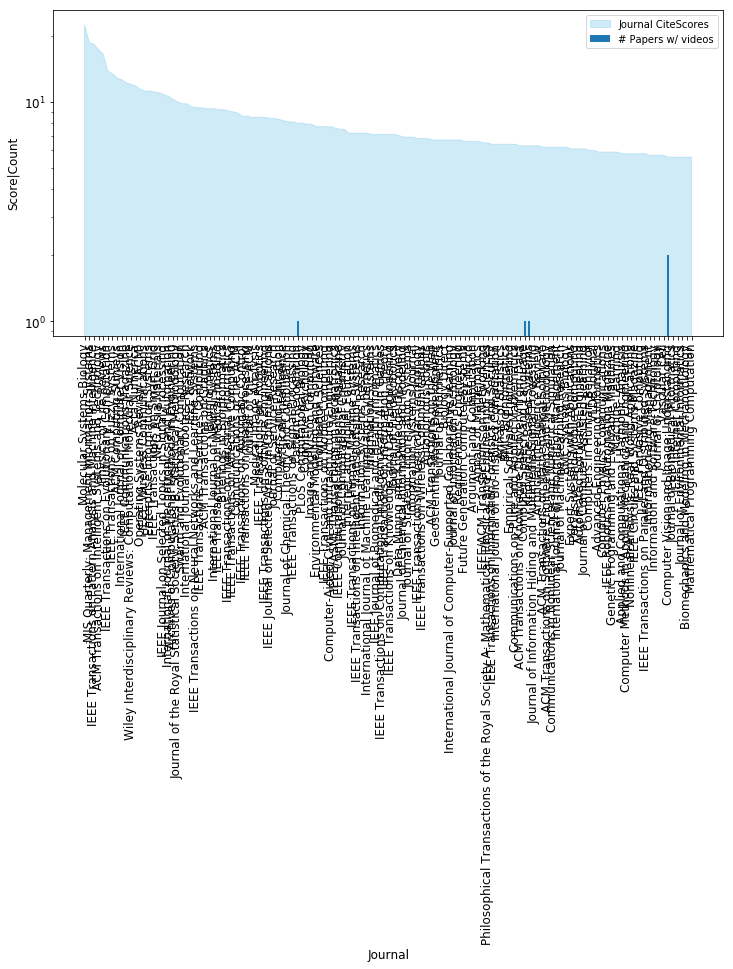

In [13]:
# until 360
scopus_2014_comp.plot_journals_scores(where=("content", ["paper_explanation", "paper_assessment", "paper_application"], "in"), days_until=360)

In [14]:
# until 360
scopus_2014_comp.journals_w_videos

Computer Vision and Image Understanding    2
Knowledge-Based Systems                    1
Computer Speech and Language               1
Pattern Recognition                        1
Name: Source title, dtype: int64

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
# Total DOIs: 14330	# DOIs w/ videos: 12	Ratio: 0.001
# Total videos: 19	# Target videos: 15	Ratio: 0.789
# Total subjects: 46	# subjects w/ videos: 7	Ratio: 0.152
# Total journals: 133	# journals w/ videos: 7	Ratio: 0.053


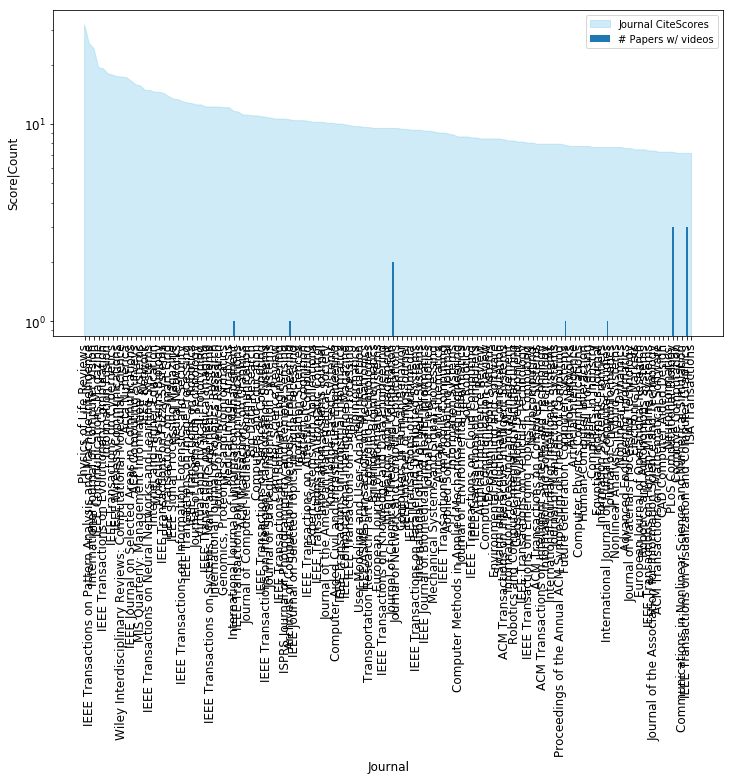

In [15]:
scopus_2019_comp.plot_journals_scores(where=("content", ["paper_explanation", "paper_assessment", "paper_application"], "in"), days_until=360)

In [16]:
scopus_2019_comp.journals_w_videos

IEEE Transactions on Visualization and Computer Graphics    3
PLoS Computational Biology                                  3
Journal of Chemical Theory and Computation                  2
Future Generation Computer Systems                          1
Archives of Computational Methods in Engineering            1
International Journal of Information Management             1
International Journal of Human Computer Studies             1
Name: Source title, dtype: int64

In [17]:
scopus_2019_comp.set_target_videos(where=("content", ["paper_explanation", "paper_assessment", "paper_application"], "in"), days_until=360)

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
# Total DOIs: 14330	# DOIs w/ videos: 12	Ratio: 0.001
# Total videos: 19	# Target videos: 15	Ratio: 0.789
# Total subjects: 46	# subjects w/ videos: 7	Ratio: 0.152
# Total journals: 133	# journals w/ videos: 7	Ratio: 0.053


In [18]:
scopus_2019_comp.set_target_videos(where=("content", ["paper_explanation", "paper_assessment", "paper_application"], "in"), days_from=360)

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
# Total DOIs: 14330	# DOIs w/ videos: 4	Ratio: 0.000
# Total videos: 19	# Target videos: 4	Ratio: 0.211
# Total subjects: 46	# subjects w/ videos: 3	Ratio: 0.065
# Total journals: 133	# journals w/ videos: 4	Ratio: 0.030


Dedicated videos until 360: 5/16(2014) -> 15/19(2019) (3x), 논문 수 9336 -> 14330로부터, 초기의 논문 해설 비디오의 수와 비율이 늘고있음이 명확함.

14년도: 1. 20년 시점에 전 저널에 골고루 분포 2. 1년 이내 비디오 논문은 전체 저널의 19%에 분포하며, 어느정도 특정 저널에 집중되는 모습이 관찰됨(비디오 10개 이상 저널과 비디오 1개 저널) 3. 1년 이내 dedicated 비디오 논문은 5편(0.1%)이며, 중하위 저널에 존재

19년도: 1. 1년 이내 비디오 논문은 전체 저널의 20%에 분포하며, 어느정도 특정 저널에 집중되는 모습이 관찰됨. 3. 1년 이내 dedicated 비디오 논문은 12편(0.1%)이며 중하위 저널에 존재

결론1 14년도도 19년도도, 1년내 비디오 논문은 높은 스코어의 저널에 우선적으로 발생하지 않았다(굳이 말하자면 2~3%)

결론2 14년도도 19년도도, 비디오가 집중되는 저널이 존재한다 -> 그들의 특징은? ex.저널이 운영하는 채널이 존재?

결론3 1년 내 dedicated 비디오 논문은 두 해 모두 0.1%이며, 중하위 저널에서 먼저 발생함 -> 얘네들의 특징은?

In [16]:
scopus_2014_comp.set_target_videos(days_until=360)
scopus_2019_comp.set_target_videos(days_until=360)

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 67	Ratio: 0.007
# Total videos: 143	# Target videos: 79	Ratio: 0.552
# Total subjects: 43	# subjects w/ videos: 18	Ratio: 0.419
# Total journals: 134	# journals w/ videos: 25	Ratio: 0.187
	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
# Total DOIs: 14330	# DOIs w/ videos: 50	Ratio: 0.003
# Total videos: 79	# Target videos: 63	Ratio: 0.797
# Total subjects: 46	# subjects w/ videos: 20	Ratio: 0.435
# Total journals: 133	# journals w/ videos: 26	Ratio: 0.195


In [17]:
# scopus_2014_comp.df_papers_w_video_scores
pd.merge(scopus_2014_comp.df_papers_w_video_scores, scopus_2019_comp.df_papers_w_video_scores, how="outer", left_index=True, right_index=True).sort_values(by=["# Papers w/ videos_x" ,"CiteScore_x" ,"# Papers w/ videos_y" ,"CiteScore_y"], ascending=False)
# pd.merge(scopus_2014_comp.df_papers_w_video_scores, scopus_2019_comp.df_papers_w_video_scores, how="outer", left_index=True, right_index=True)

,# Papers w/ videos_x,CiteScore_x,# Papers w/ videos_y,CiteScore_y
International Journal of Robotics Research,13.0,9.8,2.0,12.2
IEEE Transactions on Knowledge and Data Engineering,8.0,7.1,NaN,NaN
IEEE Transactions on Services Computing,6.0,9.4,NaN,NaN
IEEE Transactions on Software Engineering,5.0,8.5,NaN,NaN
IEEE Transactions on Parallel and Distributed Systems,5.0,5.8,NaN,NaN
IEEE Transactions on Industrial Informatics,4.0,9.1,1.0,10.0
IEEE Transactions on Neural Networks and Learning Systems,3.0,9.4,1.0,14.8
IEEE Journal of Biomedical and Health Informatics,3.0,7.1,NaN,NaN
Journal of Chemical Theory and Computation,2.0,8.1,2.0,9.5
PLoS Computational Biology,2.0,8.0,6.0,7.2


{'boxes': [<matplotlib.lines.Line2D at 0x7f902a982f98>,
 'caps': [<matplotlib.lines.Line2D at 0x7f902a982320>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f902a935048>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f902a935550>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f902a982208>,
  <matplotlib.lines.Line2D at 0x7f902a931160>]}

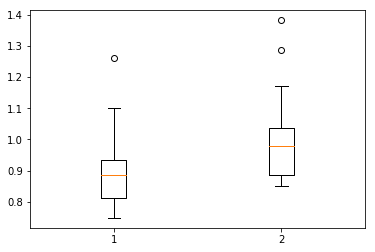

In [18]:
plt.boxplot([np.log10(scopus_2014_comp.df_papers_w_video_scores["CiteScore"]), np.log10(scopus_2019_comp.df_papers_w_video_scores["CiteScore"])])

In [19]:
scopus_2014_comp.set_target_videos(where=("content", ["paper_explanation", "paper_assessment", "paper_application"], "in"), days_until=360)
scopus_2019_comp.set_target_videos(where=("content", ["paper_explanation", "paper_assessment", "paper_application"], "in"), days_until=360)
pd.merge(scopus_2014_comp.df_papers_w_video_scores, scopus_2019_comp.df_papers_w_video_scores, how="outer", left_index=True, right_index=True).sort_values(by=["# Papers w/ videos_x" ,"CiteScore_x" ,"# Papers w/ videos_y" ,"CiteScore_y"], ascending=False)

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
# Total DOIs: 9336	# DOIs w/ videos: 5	Ratio: 0.001
# Total videos: 16	# Target videos: 5	Ratio: 0.312
# Total subjects: 43	# subjects w/ videos: 3	Ratio: 0.070
# Total journals: 134	# journals w/ videos: 4	Ratio: 0.030
	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
# Total DOIs: 14330	# DOIs w

,# Papers w/ videos_x,CiteScore_x,# Papers w/ videos_y,CiteScore_y
Computer Vision and Image Understanding,2.0,5.6,NaN,NaN
Pattern Recognition,1.0,8.0,NaN,NaN
Computer Speech and Language,1.0,6.3,NaN,NaN
Knowledge-Based Systems,1.0,6.3,NaN,NaN
PLoS Computational Biology,NaN,NaN,3.0,7.2
IEEE Transactions on Visualization and Computer Graphics,NaN,NaN,3.0,7.1
Journal of Chemical Theory and Computation,NaN,NaN,2.0,9.5
International Journal of Information Management,NaN,NaN,1.0,11.6
Archives of Computational Methods in Engineering,NaN,NaN,1.0,10.5
Future Generation Computer Systems,NaN,NaN,1.0,7.8


{'boxes': [<matplotlib.lines.Line2D at 0x7f902a8ed5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f902a8edd68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f902a8f4710>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f902a8f43c8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f902a8ed6d8>,
  <matplotlib.lines.Line2D at 0x7f902a8f9128>]}

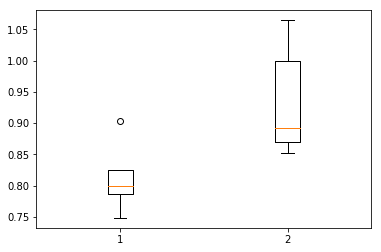

In [20]:
plt.boxplot([np.log10(scopus_2014_comp.df_papers_w_video_scores["CiteScore"]), np.log10(scopus_2019_comp.df_papers_w_video_scores["CiteScore"])])
# scopus_2014_comp.journals_scores

비디오가 존재하는 저널들의 스코어 분포와 전체 저널 스코어 분포 비교(? 애당초 정규분포가 절대 아닌데...)

In [9]:
df3_csa = df3[df3["Scopus Sub-Subject Area"] == "Computer Science Applications"]
scopus_2014_csa = ScopusHandler(df3_csa, df3_sources, "scopus_videos_2014_comp")

[+]Duplicates have been dropped from df_scopus.	Before: 1287	After: 1243


	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 1243	# DOIs w/ videos: 19	Ratio: 0.015
# Total videos: 143	# Target videos: 22	Ratio: 0.154
# Total subjects: 1	# subjects w/ videos: 1	Ratio: 1.000
# Total journals: 20	# journals w/ videos: 5	Ratio: 0.250


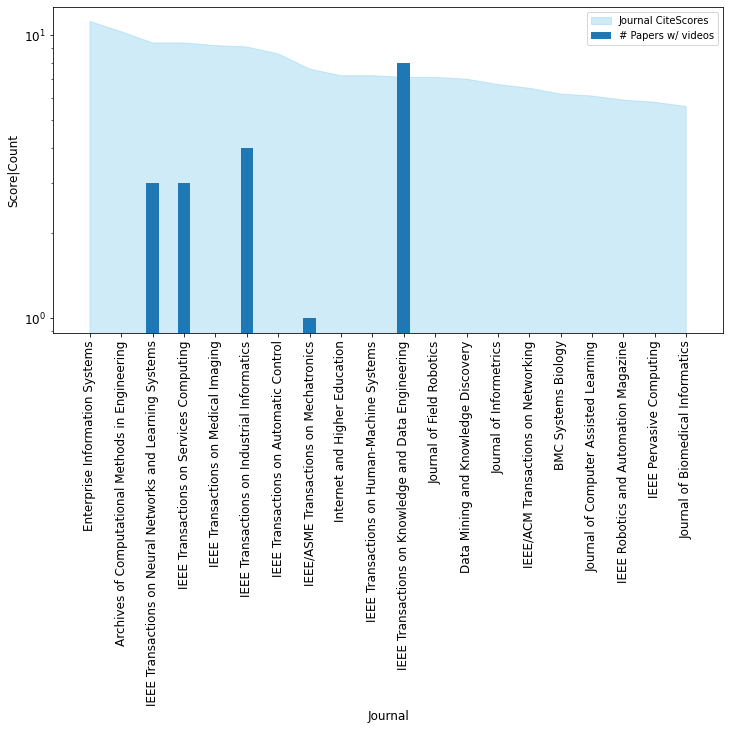

In [10]:
scopus_2014_csa.plot_journals_scores()

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
# Total DOIs: 9336	# DOIs w/ videos: 102	Ratio: 0.011
# Total videos: 143	# Target videos: 143	Ratio: 1.000
# Total subjects: 43	# subjects w/ videos: 24	Ratio: 0.558
# Total journals: 133	# journals w/ videos: 35	Ratio: 0.263


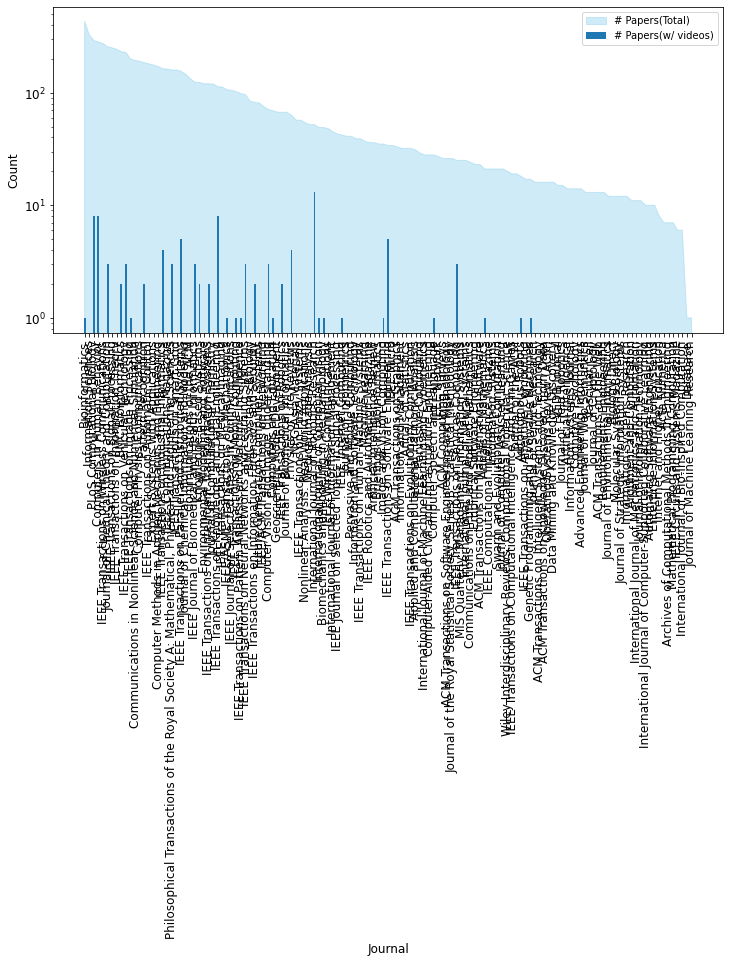

In [12]:
scopus_2014_comp.plot_journals_papers()